# Reemplazo de valores faltantes y Filtrado de Baja Varianza
Considere una variable en nuestro conjunto de datos donde todas las observaciones tienen el mismo valor, digamos 1. Si usamos esta variable, ¿cree que puede mejorar el modelo que construiremos? La respuesta es no, porque esta variable tendrá cero varianza.

Entonces, necesitamos calcular la varianza de cada variable que se nos da. Luego, eliminar  las variables que tienen una varianza baja en comparación con otras variables en nuestro conjunto de datos. La razón para hacerlo, como mencionamos anteriormente, es que las variables con una varianza baja no afectarán la variable objetivo.

In [ ]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# read the data
data_raw=! wget https://raw.githubusercontent.com/muratayoshio/PR-UNAL-2020-2/main/Train_data.csv
path = os.getcwd() + '/Train_data.csv'
train=pd.read_csv(path)
train=pd.read_csv("Train_data.csv")
# To show rows and columns
train.shape

(8523, 12)

Primero, identificamos los datos faltantes en cada dimensión

In [ ]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Reemplacemos  los valores faltantes en la columna Item_Weight usando el valor medio de las observaciones conocidas de Item_Weight. Para la columna Outlet_Size, usaremos el modo de los valores Outlet_Size conocidos para reemplazar los valores faltantes:

In [ ]:
train['Outlet_Size'].mode()[0]

'Medium'

In [ ]:
train['Item_Weight'].fillna(train['Item_Weight'].median(), inplace=True)
train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0], inplace=True)


Verifiquemos si se han completado todos los valores faltantes:

In [ ]:
train.isnull().sum()/len(train)*100

Item_Identifier              0.0
Item_Weight                  0.0
Item_Fat_Content             0.0
Item_Visibility              0.0
Item_Type                    0.0
Item_MRP                     0.0
Outlet_Identifier            0.0
Outlet_Establishment_Year    0.0
Outlet_Size                  0.0
Outlet_Location_Type         0.0
Outlet_Type                  0.0
Item_Outlet_Sales            0.0
dtype: float64


Perfecto! Estamos todos listos. Ahora calculemos la varianza de todas las variables numéricas.

In [ ]:
train.var()

Item_Weight                  1.786956e+01
Item_Visibility              2.662335e-03
Item_MRP                     3.878184e+03
Outlet_Establishment_Year    7.008637e+01
Item_Outlet_Sales            2.912141e+06
dtype: float64

Podemos visualizar esta varianza

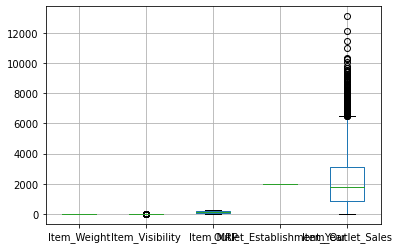

In [ ]:
train.boxplot()

Como muestra el resultado anterior, la varianza de Item_Visibility es mucho menor en comparación con las otras variables. Podemos descartar esta columna con seguridad. De esta manera se aplica el filtro de baja varianza. Implementemos esto en Python:

In [ ]:
numeric = train[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']]
var = numeric.var()
numeric = numeric.columns
variable = [ ]
for i in range(0,len(var)):
    if var[i]>=10:   #setting the threshold as 10%
       variable.append(numeric[i])
print(variable)

['Item_Weight', 'Item_MRP', 'Outlet_Establishment_Year']


El resultado nos muestra que podemos descartar la Variable que nos ofrece la menor varianza.